In [28]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
import datetime as dt
import time

### simple graph

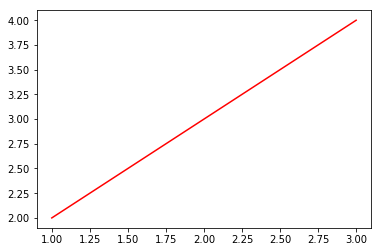

In [4]:
plt.plot([1,2,3],[2,3,4],'r')
plt.show()

### legend title and label

In [5]:
x = [1,2,3]
y = [5,7,4]

x2 = [1,2,3]
y2 = [10,14,12]

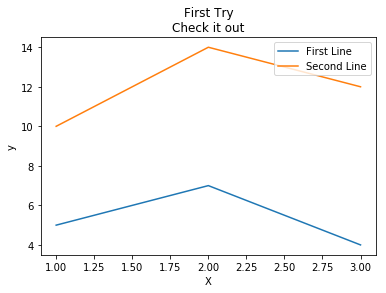

In [18]:
plt.plot(x,y, label = 'First Line')
plt.plot(x2,y2,label = 'Second Line')
plt.title("First Try\nCheck it out")
plt.xlabel("X")
plt.ylabel('y')
plt.legend(loc = 1)
plt.show()

In [15]:
plt.legend?

### Bar

In [1]:
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]

bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]


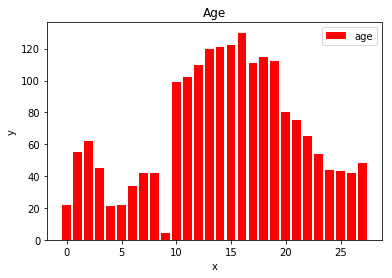

In [18]:
ids = [x for x in range(len(population_ages))]
plt.bar(ids,population_ages,label = 'age', color = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Age')
plt.legend()
plt.show()

### histgram

In [22]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]


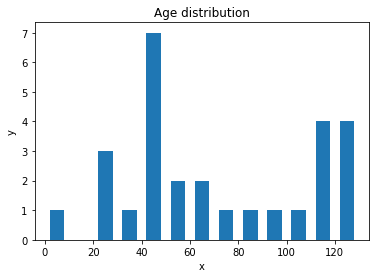

In [28]:
plt.hist(population_ages,bins, histtype='bar',rwidth=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Age distribution')
# plt.legend()
plt.show()

### scatter , compare two variable

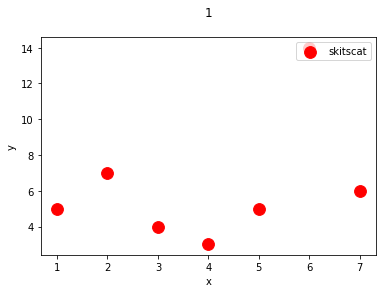

In [57]:
x = [1,2,3,4,5,6,7]
y = [5,7,4,3,5,14,6]
plt.scatter(x,y,label = 'skitscat', color = 'r',marker='.', s=555)
plt.xlabel('x')
plt.ylabel('y')
plt.title('1\n')
plt.legend(loc = 1)
plt.show()

### Stack plot， size of useness, or percentage

In [60]:
days = [1,2,3,4,5]

sleeping = [7,8,6,1,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

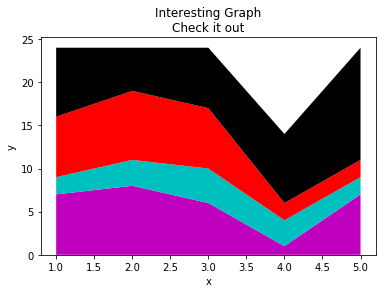

In [61]:
plt.stackplot(days, sleeping,eating,working,playing, colors=['m','c','r','k'])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.show()

#### the way to have label in stackplot

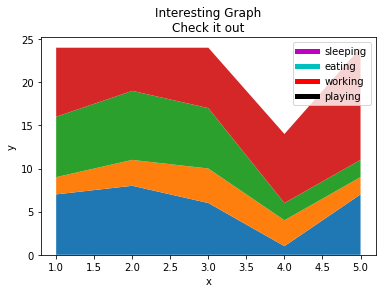

In [64]:
plt.plot([],[],color='m',label = 'sleeping', linewidth = 5)
plt.plot([],[],color='c',label = 'eating', linewidth = 5)
plt.plot([],[],color='r',label = 'working', linewidth = 5)
plt.plot([],[],color='k',label = 'playing', linewidth = 5)
plt.stackplot(days, sleeping,eating,working,playing)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

### Pie Charts with Matplotlib, percentage

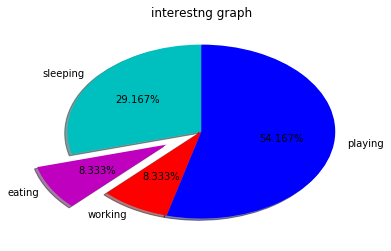

In [87]:
slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']
plt.pie(slices,labels=activities,
        colors = cols,
        startangle=90,
        shadow=True,
        explode = (0,0.3,0,0),
        autopct = '%1.3f%%')
plt.title('interestng graph')
plt.show()

### Get data from internet, modify figure, rotation

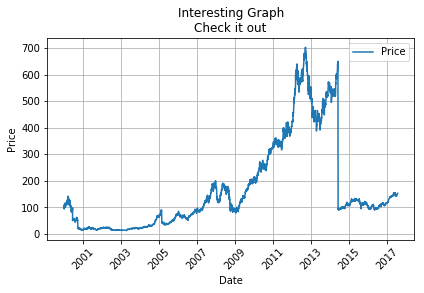

In [25]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_data(stock):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1),(0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if ' ' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#,color = 'g' )
        
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('TSLA')

### unix time convert to matplotlib

In [29]:
example = time.time()

In [31]:
print(example)

1539572006.675316


In [32]:
print(dt.datetime.fromtimestamp(example))

2018-10-14 21:53:26.675316


In [50]:
dateconv = np.vectorize(dt.datetime.fromtimestamp)

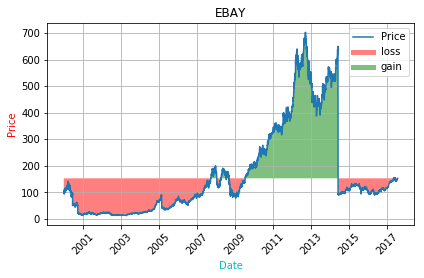

In [69]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')

    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)

    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
#     ax1.set_yticks([0,25,50,75])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')